In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geometry3k/data-00000-of-00001.arrow


In [2]:
import os
from datasets import Dataset

def load_geometry3k_dataset():
    """
    Loads the Geometry3K dataset from the Arrow file in the current directory.

    :return: A Hugging Face Dataset object.
    """
    arrow_file_path = "/kaggle/input/geometry3k/data-00000-of-00001.arrow"

    # Load the dataset from the Arrow file
    dataset = Dataset.from_file(arrow_file_path)

    return dataset

def get_train_val_test_splits(dataset):
    """
    Splits the dataset into train, validation, and test sets.
    - Train: first 2101 samples
    - Validation: next 300 samples
    - Test: remaining samples
    """
    total_samples = dataset.num_rows
    train_end = min(2101, total_samples)
    val_end = min(train_end + 300, total_samples)

    train_dataset = dataset.select(range(0, train_end))
    val_dataset   = dataset.select(range(train_end, val_end))
    test_dataset  = dataset.select(range(val_end, total_samples))

    return {
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }

# Load and split the dataset
dataset = load_geometry3k_dataset()
dataset_splits = get_train_val_test_splits(dataset)

# Show basic info
print("Train samples:", len(dataset_splits["train"]))
print("Validation samples:", len(dataset_splits["validation"]))
print("Test samples:", len(dataset_splits["test"]))

# Display the first training sample
print(dataset_splits["train"][0])


Train samples: 2101
Validation samples: 300
Test samples: 501
{'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=648x405 at 0x7B7137DA03A0>], 'problem': '<image>Find $x$.', 'answer': '2', 'id': 84, 'choices': ['1', '2', '3', '4'], 'ground_truth': 'B'}


In [3]:
dataset.shape

(2902, 6)

In [4]:
dataset

Dataset({
    features: ['images', 'problem', 'answer', 'id', 'choices', 'ground_truth'],
    num_rows: 2902
})

In [5]:
from collections import Counter

answers = [sample["ground_truth"] for sample in dataset]
answer_counts = Counter(answers)
print(answer_counts)

Counter({'B': 914, 'C': 826, 'A': 630, 'D': 532})


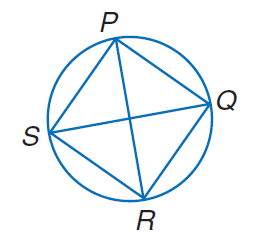


### Problem ID: 1530

**Problem:**
&lt;image&gt;$P Q R S$ is a rhombus inscribed in a circle. Find $m \angle Q R P$ 

**Choices:**
30, 45, 60, 90

**Answer (Index):** 45

**Ground Truth Label:** B


In [6]:
from IPython.display import display, Markdown
import html

first_row = dataset[11]

# Display the image
display(first_row['images'][0])

# Escape any HTML-like tags (e.g., <image>) so Markdown doesn't mess with them
problem_text = html.escape(first_row['problem'])

# Format and show all info
info = f"""
### Problem ID: {first_row['id']}

**Problem:**
{problem_text}

**Choices:**
{', '.join(first_row['choices'])}

**Answer (Index):** {first_row['answer']}

**Ground Truth Label:** {first_row['ground_truth']}
"""

display(Markdown(info))


In [7]:
# Extract and print all IDs from the dataset
all_ids = [row['id'] for row in dataset]
print(all_ids)


[84, 2561, 1318, 208, 2616, 1221, 2098, 692, 185, 2876, 2931, 1530, 2649, 2675, 1333, 979, 234, 2767, 1882, 650, 209, 1119, 1336, 2041, 187, 1509, 695, 2929, 1664, 1933, 1366, 969, 2343, 790, 2246, 154, 1201, 2315, 984, 1545, 490, 1627, 2247, 2037, 2286, 2721, 2728, 2539, 2509, 2007, 1849, 2848, 2266, 2100, 623, 166, 2584, 2210, 436, 68, 972, 2853, 778, 894, 1992, 1915, 1076, 1458, 2633, 1448, 1114, 570, 2748, 1096, 1526, 2778, 1203, 409, 263, 1953, 1052, 1913, 76, 974, 1610, 483, 1706, 405, 1703, 1744, 81, 889, 2020, 2307, 485, 2523, 83, 353, 376, 1493, 1397, 905, 2222, 1578, 311, 1864, 785, 1127, 608, 1940, 2021, 2925, 299, 141, 1894, 2146, 2390, 1814, 1314, 2211, 978, 337, 1045, 1354, 1316, 2796, 2713, 2950, 2858, 2617, 170, 301, 2253, 1690, 1515, 1718, 163, 966, 851, 861, 2077, 451, 2807, 2685, 1474, 2104, 295, 1112, 1754, 2085, 2382, 186, 1154, 1062, 1430, 1429, 2814, 1288, 1614, 2659, 2798, 1668, 2916, 2330, 630, 2151, 2923, 267, 2864, 2756, 1710, 886, 1632, 1550, 1097, 57, 2890,

In [8]:
# Examine the dataset structure
print("Dataset type:", type(dataset))
print("First item type:", type(dataset[0]))
print("Keys in first item:", dataset[0].keys() if hasattr(dataset[0], 'keys') else "Not a dictionary")

# If the dataset is a string or another format, let's see a sample
print("Sample from dataset:", dataset[0])

Dataset type: <class 'datasets.arrow_dataset.Dataset'>
First item type: <class 'dict'>
Keys in first item: dict_keys(['images', 'problem', 'answer', 'id', 'choices', 'ground_truth'])
Sample from dataset: {'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=648x405 at 0x7B7137A5E770>], 'problem': '<image>Find $x$.', 'answer': '2', 'id': 84, 'choices': ['1', '2', '3', '4'], 'ground_truth': 'B'}


In [9]:
pip install -U bitsandbytes


Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import io
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from datasets import Dataset, DatasetDict
from torch.utils.data import DataLoader, Dataset as TorchDataset
from sklearn.metrics import accuracy_score, classification_report

# Disable Weights & Biases logging
os.environ["WANDB_DISABLED"] = "true"

from transformers import (
    LlavaForConditionalGeneration, 
    LlavaProcessor, 
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer
)
from peft import LoraConfig, get_peft_model, TaskType, prepare_model_for_kbit_training

##############################################
# Dataset loading and splitting
##############################################
def load_geometry3k_dataset():
    """
    Loads the Geometry3K dataset from the Arrow file in the current directory.
    :return: A Hugging Face Dataset object.
    """
    arrow_file_path = "/kaggle/input/geometry3k/data-00000-of-00001.arrow"

    # Load the dataset from the Arrow file
    dataset = Dataset.from_file(arrow_file_path)
    return dataset

def get_train_val_test_splits(dataset):
    """
    Splits the dataset into train, validation, and test sets.
    - Train: first 2101 samples
    - Validation: next 300 samples
    - Test: remaining samples
    """
    total_samples = dataset.num_rows
    train_end = min(2101, total_samples)
    val_end = min(train_end + 300, total_samples)

    train_dataset = dataset.select(range(0, train_end))
    val_dataset   = dataset.select(range(train_end, val_end))
    test_dataset  = dataset.select(range(val_end, total_samples))

    return {
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }

# Load and split the dataset
dataset = load_geometry3k_dataset()
dataset_splits = get_train_val_test_splits(dataset)
print("Train samples:", len(dataset_splits["train"]))
print("Validation samples:", len(dataset_splits["validation"]))
print("Test samples:", len(dataset_splits["test"]))
print("First training sample:")
print(dataset_splits["train"][0])

##############################################
# Data Preparation
##############################################
def prepare_dataset(dataset_split):
    prepared_data = []
    
    for idx, item in enumerate(dataset_split):
        # Check if images are present
        if not item['images']:
            continue
            
        # Process each image in the item
        for img in item['images']:
            # Convert image data to PIL Image based on its format
            if isinstance(img, bytes):
                img = Image.open(io.BytesIO(img))
            elif isinstance(img, str):
                img = Image.open(img)
            elif isinstance(img, np.ndarray):
                img = Image.fromarray(img)
                
            # Create an entry for this image
            entry = {
                'image': img,
                'problem_text': item['problem'],
                'choices': item['choices'],
                'ground_truth': item['ground_truth'],
                'answer': item['answer'],
                'id': item['id']
            }
            prepared_data.append(entry)
    
    return Dataset.from_list(prepared_data)

# Prepare splits for training, validation, and test
train_data = prepare_dataset(dataset_splits["train"])
val_data = prepare_dataset(dataset_splits["validation"])
test_data = prepare_dataset(dataset_splits["test"])

processed_dataset = DatasetDict({
    'train': train_data,
    'validation': val_data,
    'test': test_data
})

##############################################
# Load model and processor
##############################################
model_name = "llava-hf/llava-1.5-7b-hf"  # Adjust model choice if needed

processor = LlavaProcessor.from_pretrained(model_name)
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,  # Alternatively load_in_4bit=True if desired
    llm_int8_threshold=6.0,
    llm_int8_skip_modules=None,
    llm_int8_enable_fp32_cpu_offload=True
)

model = LlavaForConditionalGeneration.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    torch_dtype=torch.float16,
)

model = prepare_model_for_kbit_training(model)

##############################################
# Create custom dataset class for training
##############################################
class GeometryDataset(TorchDataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        item = self.dataset[idx]
        # Construct prompt for the problem
        prompt = f"""
        Please solve this geometry problem.
        
        Problem: {item['problem_text']}
        
        Options:
        A: {item['choices'][0]}
        B: {item['choices'][1]}
        C: {item['choices'][2]}
        D: {item['choices'][3]}
        
        The correct answer is: 
        """
        inputs = self.processor(
            text=prompt,
            images=item['image'],
            return_tensors="pt",
            padding="max_length",
            max_length=512,
            truncation=True
        )
        
        target_text = item['ground_truth']
        target = self.processor.tokenizer(
            target_text,
            return_tensors="pt",
            padding="max_length",
            max_length=8,
            truncation=True
        )
        
        # Squeeze dimensions
        for k, v in inputs.items():
            if isinstance(v, torch.Tensor):
                inputs[k] = v.squeeze()
        
        inputs["labels"] = target["input_ids"].squeeze()
        return inputs

##############################################
# Data collator function
##############################################
def collate_fn(batch):
    input_ids = torch.stack([item["input_ids"] for item in batch])
    attention_mask = torch.stack([item["attention_mask"] for item in batch])
    labels = torch.stack([item["labels"] for item in batch])
    
    if "pixel_values" in batch[0]:
        pixel_values = torch.stack([item["pixel_values"] for item in batch])
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels,
            "pixel_values": pixel_values
        }
    else:
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }

##############################################
# Apply LoRA for efficient fine-tuning
##############################################
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=16,  # Rank
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    bias="none",
)

peft_model = get_peft_model(model, peft_config)
trainable_params = sum(p.numel() for p in peft_model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in peft_model.parameters())
print(f"Trainable parameters: {trainable_params}")
print(f"Total parameters: {total_params}")
print(f"Percentage of trainable parameters: {100 * trainable_params / total_params:.2f}%")

##############################################
# Training Arguments with DataLoader workers set to 0
##############################################
training_args = TrainingArguments(
    output_dir="./geometry_vlm_model",
    run_name="geometry_vlm_finetuning",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
    fp16=True,
    logging_steps=10,
    save_strategy="epoch",
    dataloader_num_workers=0  # Set to 0 to disable multi-worker data loading
)

##############################################
# Prepare training and evaluation datasets
##############################################
train_dataset = GeometryDataset(processed_dataset["train"], processor)
eval_dataset = GeometryDataset(processed_dataset["validation"], processor)

##############################################
# Minimal Forward-Backward Dry Run
##############################################
print("Running a minimal forward-backward pass to validate the training loop...")
sample = train_dataset[0]
for key in sample:
    sample[key] = sample[key].unsqueeze(0)  # add batch dimension

# Move sample tensors to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for key, tensor in sample.items():
    sample[key] = tensor.to(device)

peft_model.to(device)
peft_model.train()
optimizer = torch.optim.Adam(peft_model.parameters(), lr=training_args.learning_rate)

# Forward pass
outputs = peft_model(**sample)
loss = outputs.loss
print("Dry run loss:", loss.item())

# Backward pass
loss.backward()
optimizer.step()
print("Dry run forward-backward pass completed successfully.\n")

##############################################
# Initialize Trainer and start training
##############################################
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=collate_fn,
)

print("Starting training...")
trainer.train()
print("Training completed.")

##############################################
# Save the fine-tuned model and processor
##############################################
peft_model.save_pretrained("./geometry_vlm_final")
processor.save_pretrained("./geometry_vlm_final")
print("Model and processor saved.")

##############################################
# Inference and Evaluation Functions
##############################################
def predict(model, processor, image, problem, choices):
    prompt = f"""
    Please solve this geometry problem.
    
    Problem: {problem}
    
    Options:
    A: {choices[0]}
    B: {choices[1]}
    C: {choices[2]}
    D: {choices[3]}
    
    The correct answer is: 
    """
    inputs = processor(
        text=prompt,
        images=image,
        return_tensors="pt"
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=5,
            num_beams=4,
            do_sample=False
        )
    prediction = processor.decode(outputs[0], skip_special_tokens=True)
    prediction = prediction.strip()
    if len(prediction) >= 1:
        return prediction[0]
    else:
        return ""

def evaluate_model(model, dataset, processor):
    model.eval()
    predictions = []
    ground_truths = []
    ids = []
    
    for i, item in enumerate(dataset):
        pred = predict(model, processor, item["image"], item["problem_text"], item["choices"])
        predictions.append(pred)
        ground_truths.append(item["ground_truth"])
        ids.append(item["id"])
        if (i + 1) % 10 == 0:
            print(f"Processed {i+1}/{len(dataset)} examples")
    
    accuracy = accuracy_score(ground_truths, predictions)
    report = classification_report(ground_truths, predictions)
    results_df = pd.DataFrame({
        "id": ids,
        "prediction": predictions,
        "ground_truth": ground_truths,
        "correct": [p == g for p, g in zip(predictions, ground_truths)]
    })
    
    return {
        "accuracy": accuracy,
        "report": report,
        "results": results_df
    }

##############################################
# Evaluate on Test Data and Save Predictions
##############################################
print("Evaluating on test data...")
test_results = evaluate_model(peft_model, processed_dataset["test"], processor)
print(f"Test Accuracy: {test_results['accuracy']}")
print(test_results['report'])
test_results['results'].to_csv("geometry_predictions_results.csv", index=False)
print("Evaluation complete and results saved.")


Train samples: 2101
Validation samples: 300
Test samples: 501
First training sample:
{'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=648x405 at 0x7B7137DA1330>], 'problem': '<image>Find $x$.', 'answer': '2', 'id': 84, 'choices': ['1', '2', '3', '4'], 'ground_truth': 'B'}


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Trainable parameters: 42336256
Total parameters: 7105763328
Percentage of trainable parameters: 0.60%
Running a minimal forward-backward pass to validate the training loop...


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
Expanding inputs for image tokens in LLaVa should be done in processing. Please ad

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
